# Air Quality Prediction

An air quality index (AQI) is used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become. Public health risks increase as the AQI rises. Different countries have their own air quality indices, corresponding to different national air quality standards.

For Air quality prediction we will use 4 algorithms:

1.Linear Regression

2.Lasso Regression

3.Ridge Regression

4.Decision Tree Regressor

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by error check and accuracy check.

### Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Cleaning

Step 3: Data Visualization

Step 4:Data training

Step 5: Model Creation

Step 6: Performance Evaluation

### Attributes in the dataset:


In [105]:
#  City: City
# Date: Date
# PM2.5: Particulate Matter 2.5-micrometer in ug / m3
# PM10: Particulate Matter 10-micrometer in ug / m3
# NO: Nitric Oxide in ug / m3
# NO2:Nitric Dioxide in ug / m3
# NOx:Any Nitric x-oxide in ppb
# CO:Carbon Monoxide in mg / m3
# SO2:Sulphur Dioxide in ug / m3
# O3:Ozone in ug / m3
# Benzene:Benzene in ug / m3
# Toluene:Toluene in ug / m3
# Xylene:Xylene in ug / m3
# AQI:Air Quality Index
# AQI_Bucket:Air Quality Index bucket

## **Data Exploration**

In [4]:
import pandas as pd

In [5]:
data=pd.read_csv('city_day.csv')
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [6]:
data.shape

(29531, 16)

In [7]:
data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [8]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

## Data cleaning

As we can see above there are null or missing values in the data.We cannot use this type of data with null values as it affects the performance as well as the accuracy of the model.Therefore, we will clean the data.

For data cleaning, we'll fill the null values by their column's respective mean.

In [10]:
data['PM2.5'].isnull().sum()

np.int64(4598)

In [11]:
data['PM2.5'].mean()

np.float64(67.45057794890306)

In [14]:
data['PM2.5'].fillna(67.0,inplace=True)

In [15]:
data['PM2.5'].isnull().sum()

np.int64(0)

In [16]:
data['PM10'].isnull().sum()

np.int64(11140)

In [17]:
data['PM10'].mean()

np.float64(118.12710293078135)

In [20]:
data['PM10'].fillna(118.0,inplace=True)

In [21]:
data['PM10'].isnull().sum()

np.int64(0)

In [22]:
data['NO'].isnull().sum()

np.int64(3582)

In [23]:
data['NO'].mean()

np.float64(17.574729662029362)

In [25]:
data['NO'].fillna(17.0,inplace=True)

In [26]:
data['NO'].isnull().sum()

np.int64(0)

In [27]:
data['NO2'].isnull().sum()

np.int64(3585)

In [28]:
data['NO2'].mean()

np.float64(28.560659061126955)

In [34]:
data['NO2'] = data['NO2'].fillna(28.0)

In [35]:
data['NO2'].isnull().sum()

np.int64(0)

In [36]:
data['CO'].isnull().sum()

np.int64(2059)

In [37]:
data['CO'].mean()

np.float64(2.2485982090856145)

In [39]:
data['CO'] = data['CO'].fillna(2)


In [40]:
data['CO'].isnull().sum()

np.int64(0)

In [41]:
data['SO2'].isnull().sum()

np.int64(3854)

In [42]:
data['SO2'].mean()

np.float64(14.53197725590996)

In [44]:
data['SO2'] = data['SO2'].fillna(14)


In [45]:
data['SO2'].isnull().sum()

np.int64(0)

In [46]:
data['O3'].isnull().sum()

np.int64(4022)

In [47]:
data['O3'].mean()

np.float64(34.49143047551845)

In [49]:
data['O3'] = data['O3'].fillna(34)


In [50]:
data['O3'].isnull().sum()

np.int64(0)

In [51]:
data['AQI'].isnull().sum()

np.int64(4681)

In [52]:
data['AQI'].mean()

np.float64(166.4635814889336)

In [53]:
data['AQI'] = data['AQI'].fillna(166)


In [54]:
data['AQI'].isnull().sum()

np.int64(0)

In [55]:
data.isnull().sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx            4185
NH3           10328
CO                0
SO2               0
O3                0
Benzene        5623
Toluene        8041
Xylene        18109
AQI               0
AQI_Bucket     4681
dtype: int64

In [56]:
#Drop unwanted columns.
newdata=data.drop(['City', 'Date','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)
newdata.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [57]:
newdata.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

There are no null values present in the data.We can proceed with next steps.

In [58]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   29531 non-null  object 
 1   PM10    29531 non-null  object 
 2   NO      29531 non-null  object 
 3   NO2     29531 non-null  object 
 4   CO      29531 non-null  object 
 5   SO2     29531 non-null  object 
 6   O3      29531 non-null  object 
 7   AQI     29531 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.8+ MB


In [60]:
#converting data into int datatype to avoid errors below.
prepareddata=newdata.astype(float)
prepareddata.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67.0,118.0,0.92,28.0,0.92,27.64,133.36,166.0
1,67.0,118.0,0.97,28.0,0.97,24.55,34.06,166.0
2,67.0,118.0,17.40,28.0,17.40,29.07,30.70,166.0
3,67.0,118.0,1.70,28.0,1.70,18.59,36.08,166.0
4,67.0,118.0,22.10,28.0,22.10,39.33,39.31,166.0


In [61]:
prepareddata.tail()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
29526,15.02,50.94,7.68,28.0,0.47,8.55,23.30,41.0
29527,24.38,74.09,3.42,28.0,0.52,12.72,30.14,70.0
29528,22.91,65.73,3.45,28.0,0.48,8.42,30.96,68.0
29529,16.64,49.97,4.05,28.0,0.52,9.84,28.30,54.0
29530,15.00,66.00,0.40,28.0,0.59,2.10,17.05,50.0


In [62]:
prepareddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   29531 non-null  float64
 1   PM10    29531 non-null  float64
 2   NO      29531 non-null  float64
 3   NO2     29531 non-null  float64
 4   CO      29531 non-null  float64
 5   SO2     29531 non-null  float64
 6   O3      29531 non-null  float64
 7   AQI     29531 non-null  float64
dtypes: float64(8)
memory usage: 1.8 MB


The above is the prepared data that we will use for visualization and model creation

In [63]:
prepareddata.describe()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
count,29531.000000,29531.000000,29531.000000,29531.0,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.380423,118.079156,17.505017,28.0,2.231265,14.462551,34.424500,166.390099
std,59.414701,71.500980,21.360044,0.0,6.716051,16.910037,20.164148,129.064459
min,0.040000,0.010000,0.020000,28.0,0.000000,0.010000,0.010000,13.000000
25%,32.150000,79.315000,6.210000,28.0,0.540000,6.090000,20.740000,88.000000
50%,58.030000,118.000000,11.530000,28.0,0.950000,10.480000,34.000000,138.000000
75%,72.450000,118.000000,17.570000,28.0,1.710000,14.000000,42.730000,179.000000
max,949.990000,1000.000000,390.680000,28.0,175.810000,193.860000,257.730000,2049.000000


## **Data visualization**

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

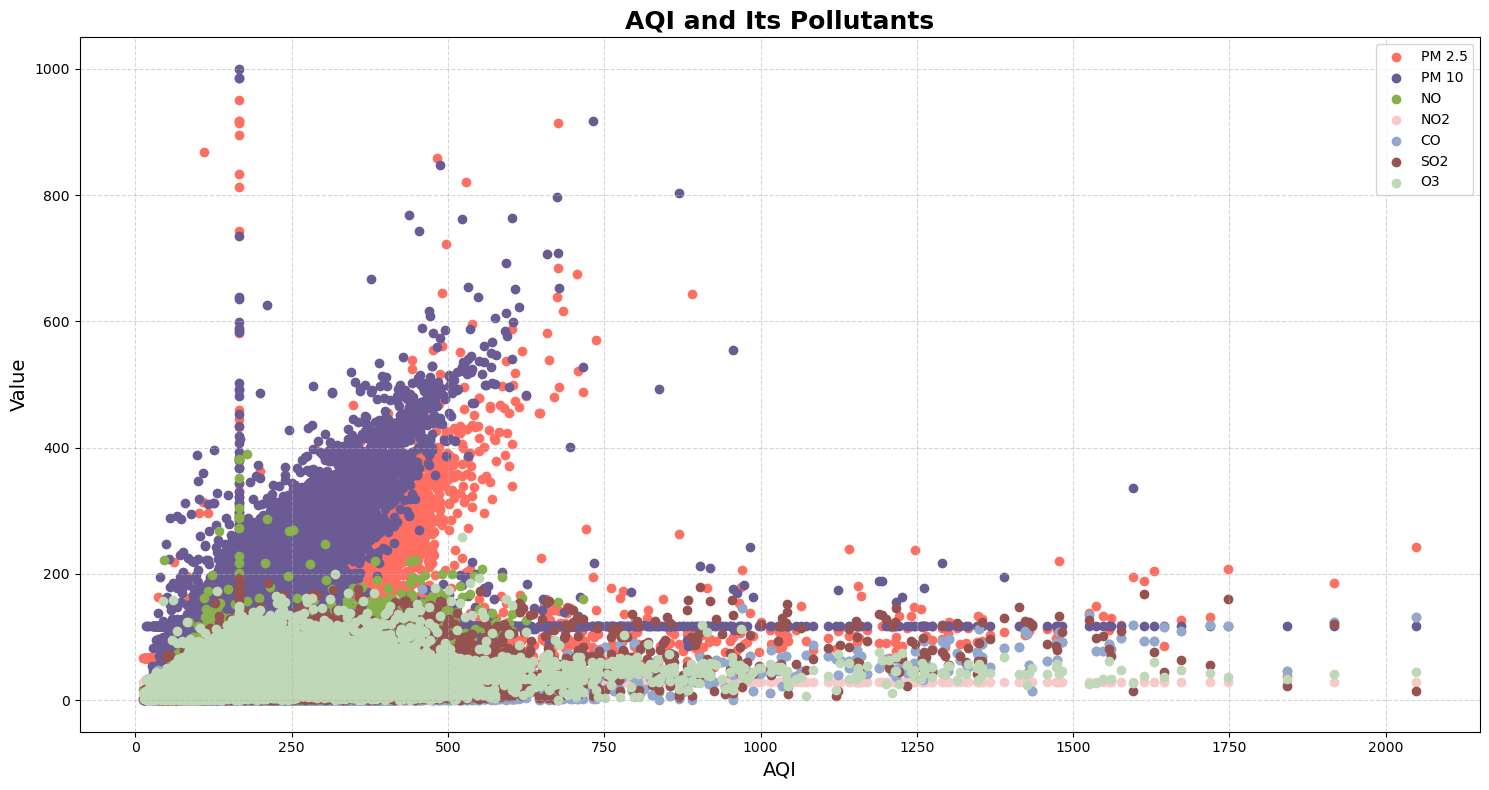

In [73]:
x = prepareddata['AQI']
y1 = prepareddata['PM2.5']
y2 = prepareddata['PM10']
y3 = prepareddata['NO']
y4 = prepareddata['NO2']
y5 = prepareddata['CO']
y6 = prepareddata['SO2']
y7 = prepareddata['O3']

plt.figure(figsize=(15,8))
plt.scatter(x, y1, label='PM 2.5', color='#FF6F61')       # Coral Red
plt.scatter(x, y2, label='PM 10', color='#6B5B95')        # Indigo
plt.scatter(x, y3, label='NO', color='#88B04B')           # Olive Green
plt.scatter(x, y4, label='NO2', color='#F7CAC9')          # Rose Quartz
plt.scatter(x, y5, label='CO', color='#92A8D1')           # Airy Blue
plt.scatter(x, y6, label='SO2', color='#955251')          # Mauve
plt.scatter(x, y7, label='O3', color='#BFD8B8')           # Mint

plt.title('AQI and Its Pollutants', fontsize=18, fontweight='bold')
plt.xlabel('AQI', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [80]:
#to find correlation between different columns.
corr = prepareddata.corr() 
sns.heatmap(corr, annot=True)

<Axes: >

Insights :

1.When the value of pollutents is less, Air Quality Index (AQI) is less.

2.AQI highly depends on 

ground-level ozone

particle pollution (also known as particulate matter, including PM2.5 and PM10)

carbon monoxide

sulfur dioxide

nitrogen dioxide

## **Data training**

In [81]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have features and y will have our target i.e. Air Quality Index(AQI).
x=prepareddata[['PM2.5', 'PM10', 'NO', 'NO2','CO', 'SO2','O3']]  
y=prepareddata['AQI']

In [76]:
x.shape

(29531, 7)

In [77]:
y.shape

(29531,)

In [82]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
#Ratio used for splitting training and testing data is 8:2 respectively

## **Model Creation**

### Linear Regression

In [83]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression 
reg1 = LinearRegression()

In [84]:
# Fitting data into the model.
reg1.fit(x_train, y_train)

LinearRegression()

In [85]:
# Making predictions 
pred1 = reg1.predict(x_test)

In [86]:
pred1

array([162.79893158, 144.05273726,  51.9591752 , ..., 121.79294101,
       167.76456232, 757.76135755])

In [87]:
print("Accuracy of the LinearRegression model comes to be: \n ") 
print(reg1.score(x_train,y_train))

Accuracy of the LinearRegression model comes to be: 
 
0.7886531181363842


### Lasso Regression 

In [88]:
# Importing model
from sklearn.linear_model import Lasso
reg2 = Lasso()

In [89]:
# Fitting data into the model.
reg2.fit(x_train, y_train)

Lasso()

In [90]:
# Making predictions 
pred2 = reg2.predict(x_test)

In [91]:
pred2

array([162.80537344, 144.12148839,  52.00833471, ..., 121.88427118,
       167.72946751, 756.81959098])

In [92]:
print("Accuracy of the LassoRegression model comes to be: \n ") 
print(reg2.score(x_train,y_train))

Accuracy of the LassoRegression model comes to be: 
 
0.7886515200920234


### Ridge Regression

In [93]:
# Importing model
from sklearn.linear_model import Ridge
reg3 = Ridge()

In [94]:
# Fitting data into the model.
reg3.fit(x_train, y_train)

Ridge()

In [95]:
# Making predictions 
pred3= reg3.predict(x_test)

In [96]:
pred3

array([162.79893322, 144.05276195,  51.95918923, ..., 121.79296279,
       167.76459216, 757.76108658])

In [97]:
print("Accuracy of the RidgeRegression model comes to be: \n ") 
print(reg3.score(x_train,y_train))

Accuracy of the RidgeRegression model comes to be: 
 
0.7886531181360292


### Decision Tree Regressor

In [98]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
reg4 = DecisionTreeRegressor()

In [99]:
#Fitting data into the model.
reg4.fit(x_train, y_train)

DecisionTreeRegressor()

In [100]:
# Making predictions on Test data 
pred4 = reg4.predict(x_test)

In [101]:
pred4

array([164.47464342, 166.        ,  29.        , ..., 106.        ,
       171.        , 883.        ])

In [102]:
print("Accuracy of the Decision Tree Regressor  model comes to be: \n ") 
print(reg4.score(x_train,y_train))

Accuracy of the Decision Tree Regressor  model comes to be: 
 
0.9990985651457029


## **Performance Evaluation**

In [103]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train,y_train)))
print("""Lasso Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(x_train,y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), reg3.score(x_train,y_train)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), reg4.score(x_train,y_train)))


Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 60.3762 	 		 0.7887
Lasso Regression 		 60.3734 	 		 0.7887
Ridge Regression 		 60.3762 	 		 0.7887
Decision Tree Regressor		 58.6625 	 		 0.9991


Conclusion:
Accuracy of Regression models- Linear regression, lasso regression and rigde regression is almost same. 

Whereas accuracy of decision tree regressor is higher and root mean sqaure error is least.

Decision tree regressor is more efficient model.